# STRUCTURE VALIDATION METRICS

In this notebook, we explore different structure validation metrics provided by the PDBe to assess the quality of the structures used in this analysis. The input file needed to run this analysis is not on the repository due to file size storage limits.

### IMPORTING NECESSARY PACKAGES

In [1]:
import os
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### SOME FUNCTIONS

In [61]:
def plot_hist(data, feat_name, bns, col, show = True, out = None, dpi = 100, figsize = (5, 5), yticks = None, et = None, logx = False, logy = 10):
    """
    """
    if type(data) != list:
        data = data.tolist()
    st_median = round(statistics.median(data), 2)
    st_mean = round(statistics.mean(data), 2)
    st_max = round(max(data),2)
    st_min = round(min(data), 2)
    print("\tMIN = {}\tMEAN = {}\tMEDIAN = {}\tMAX = {}".format(st_min, st_mean, st_median, st_max))
    
    fig = plt.figure(figsize = figsize, dpi = dpi)
    sns.histplot(data, fill = True, color = col, stat = "count", element = "step", bins = bns, log_scale = (logx, logy))
    plt.ylabel("log(count)")
    plt.xlabel(feat_name)
    plt.axvline(x = st_median, linewidth = 1, color = "k", linestyle = "--")
    if et != None:
        plt.axvline(x = et, linewidth = 2, color = "r", linestyle = "--")
    
    if yticks != None:
        plt.yticks(yticks)
    #plt.legend(edgecolor = "k")
    if out != None:
        plt.savefig(out)
    if show == False:
        plt.close()

### READING INPUT DATA

In [3]:
main_dir = "/cluster/gjb_lab/2394007/pandda_analysis/phase4/"
val_d = pd.read_pickle(os.path.join(main_dir, "validation_data.pkl"))

In [4]:
val_d.shape

(1121927, 34)

In [5]:
val_d.head(3)

,pdb_id,validation_NatomsEDS,validation_altcode,validation_avgoccu,validation_chain,validation_cis_peptide,validation_ent,validation_flippable-sidechain,validation_icode,validation_ligand_chirality_outlier,...,validation_rama,validation_resname,validation_resnum,validation_resnum_full,validation_rota,validation_rscc,validation_rsr,validation_rsrz,validation_said,validation_seq
0,5fzl,6.0,.,1.0,A,NaN,1,NaN,??,NaN,...,NaN,SER,-1,-1,p,0.937,0.369,3.393,A,1
1,5fzl,8.0,.,1.0,A,NaN,1,NaN,??,NaN,...,Allowed,MET,0,0,mmt,0.839,0.209,0.905,A,2
2,5fzl,11.0,.,1.0,A,NaN,1,NaN,??,NaN,...,Favored,PHE,26,26,t80,0.982,0.153,-0.087,A,3


In [6]:
cs = [
    "pdb_id", "validation_chain",
    #'validation_ligand_chirality_outlier', 'validation_ligand_clashes_outlier', 'validation_ligand_geometry_outlier',
    #'validation_ligand_num_clashes', 'validation_ligand_num_symm_clashes',
    'validation_resname', 'validation_resnum', #'validation_resnum_full',
    'validation_rsr', 'validation_rscc', 'validation_rsrz',
    #'validation_said', 'validation_seq'
]

### VALIDATION ANALYSIS FOR ALL RESIDUES

1111797
	MIN = 0.01	MEAN = 0.14	MEDIAN = 0.11	MAX = 4.27


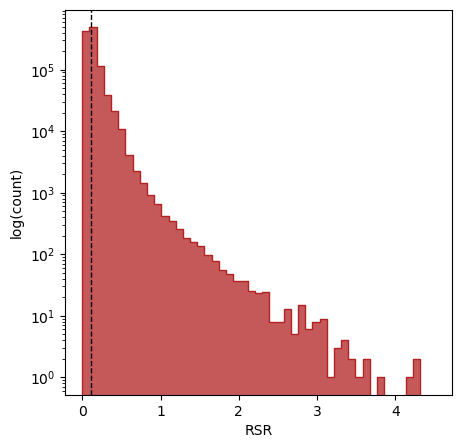

In [7]:
d_rsr = val_d.query('validation_rsr == validation_rsr')
print(len(d_rsr))
bns_rsr = np.linspace(0, 4.5, 50)
plot_hist(d_rsr.validation_rsr, "RSR", bns_rsr, "firebrick")

1111797	933518	83.96%
	MIN = -0.76	MEAN = 0.91	MEDIAN = 0.94	MAX = 1.0


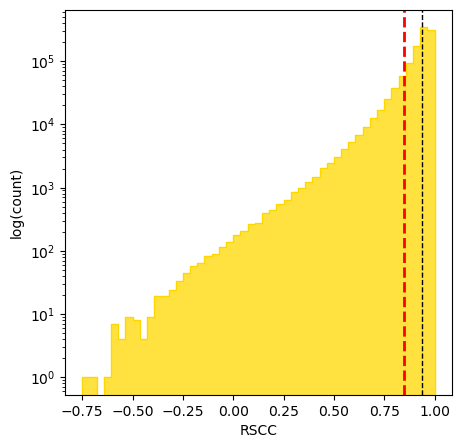

In [8]:
d_rscc = val_d.query('validation_rscc == validation_rscc')
rscc_len = len(d_rscc)
rscc_t_len = len(d_rscc.query('validation_rscc > 0.85'))
print("{}\t{}\t{}%".format(rscc_len, rscc_t_len, round(100*(rscc_t_len/rscc_len),2)))
bns_rscc = np.linspace(-0.75, 1.0, 50)
plot_hist(d_rscc.validation_rscc, "RSCC", bns_rscc, "gold", et = 0.85)

643193	590313	91.78%
	MIN = -1.74	MEAN = 0.38	MEDIAN = -0.06	MAX = 38.63


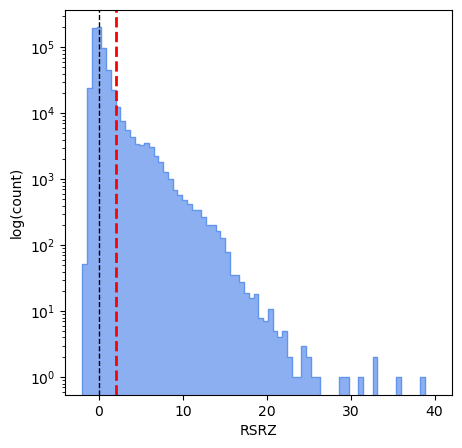

In [9]:
d_rsrz = val_d.query('validation_rsrz == validation_rsrz')
rsrz_len = len(d_rsrz)
rsrz_t_len = len(d_rsrz.query('validation_rsrz < 2'))
print("{}\t{}\t{}%".format(rsrz_len, rsrz_t_len, round(100*(rsrz_t_len/rsrz_len),2)))
bns_rsrz = np.linspace(-2, 40, 75)
plot_hist(d_rsrz.validation_rsrz, "RSRZ", bns_rsrz, "cornflowerblue", et = 2)

### APPLY FILTERS

In [10]:
q = 'validation_rsr == validation_rsr & validation_rscc == validation_rscc & validation_rsrz == validation_rsrz & validation_rscc > 0.85 & validation_rsrz < 2'
val_d_filt = val_d.copy().query(q)

	MIN = 0.85	MEAN = 0.95	MEDIAN = 0.95	MAX = 1.0


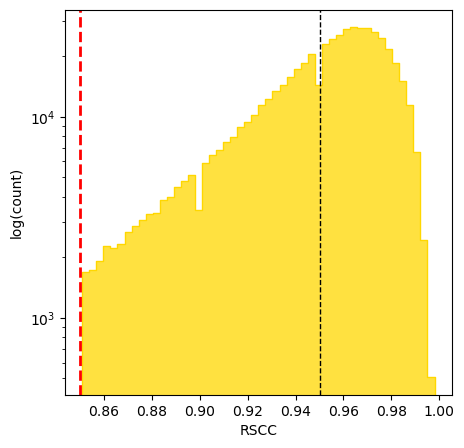

In [11]:
#bns_rscc = np.linspace(-0.75, 1.0, 50)
plot_hist(val_d_filt.validation_rscc, "RSCC", 50, "gold", et = 0.85)

	MIN = -1.74	MEAN = -0.05	MEDIAN = -0.16	MAX = 2.0


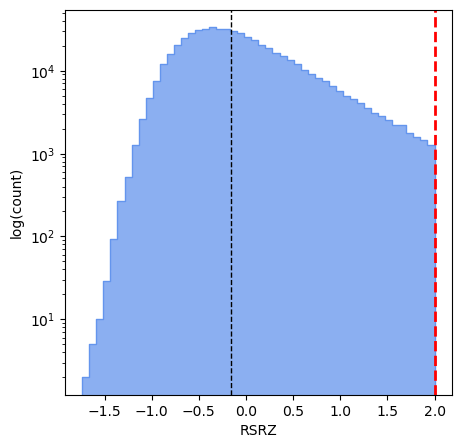

In [12]:
#bns_rscc = np.linspace(-0.75, 1.0, 50)
plot_hist(val_d_filt.validation_rsrz, "RSRZ", 50, "cornflowerblue", et = 2)

### LOOKING AT QUALITY OF LIGANDS

In [14]:
pdb_resnames = [
    "ALA", "CYS", "ASP", "GLU", "PHE", "GLY", "HIS", "ILE", "LYS", "LEU",
    "MET", "ASN", "PRO", "GLN", "ARG", "SER", "THR", "VAL", "TRP", "TYR"
]

simple_ions = [
    "ZN", "MN", "CL", "MG", "CD", "NI", "NA", "IOD", "CA", "BR", "XE", "TB", #FE, K, CO, NO3, AZI, R
]

acidic_ions = [
    "PO4", "ACT", "SO4", "MLI", "CIT", "ACY", "VO4", "WO4"
]

non_relevant_ligs_manual = [
    "DMS", "EDO", "HOH", "TRS", "GOL", "OGA", "FMN", "PG4", "PGR",
    "MPD", "TPP", "MES", "PLP", "HYP", "CSO", "UNX", "EPE", "PEG",
    "PGE", "DOD", "SUI", "BEN", "BOG"
]

non_relevant = non_relevant_ligs_manual + simple_ions + acidic_ions



In [15]:
val_d_lig = val_d.query('validation_resname not in @pdb_resnames & validation_resname not in @non_relevant')

In [16]:
val_d_lig.shape

(2189, 34)

2133	632	29.63%
	MIN = -0.18	MEAN = 0.71	MEDIAN = 0.76	MAX = 1.0


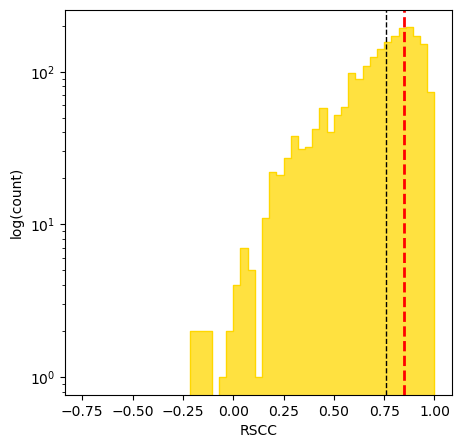

In [17]:
d_rscc_lig = val_d_lig.query('validation_rscc == validation_rscc')
rscc_len = len(d_rscc_lig)
rscc_t_len = len(d_rscc_lig.query('validation_rscc > 0.85'))
print("{}\t{}\t{}%".format(rscc_len, rscc_t_len, round(100*(rscc_t_len/rscc_len),2)))
bns_rscc = np.linspace(-0.75, 1.0, 50)
plot_hist(d_rscc_lig.validation_rscc, "RSCC", bns_rscc, "gold", et = 0.85)

### SOME EXAMPLES

In [18]:
sub = val_d.query('pdb_id == "5rhg"')

In [19]:
sub.query('validation_resname == "NY7"')[cs]

,pdb_id,validation_chain,validation_resname,validation_resnum,validation_rsr,validation_rscc,validation_rsrz
442,5rhg,A,NY7,704,0.217,0.665,NaN
443,5rhg,A,NY7,705,0.166,0.823,NaN


In [20]:
BS0 = [264, 265, 267, 268, 271, 293, 493, 536, 537, 540]

In [21]:
sub.query('validation_resnum in @BS0')[cs]

,pdb_id,validation_chain,validation_resname,validation_resnum,validation_rsr,validation_rscc,validation_rsrz
82,5rhg,A,ALA,264,0.066,0.966,-0.400
83,5rhg,A,THR,265,0.058,0.971,-0.612
85,5rhg,A,THR,267,0.053,0.977,-0.731
86,5rhg,A,SER,268,0.043,0.978,-0.904
89,5rhg,A,LEU,271,0.088,0.917,-0.027
111,5rhg,A,SER,293,0.053,0.980,-0.703
313,5rhg,A,LEU,493,0.066,0.959,-0.690
356,5rhg,A,MET,536,0.065,0.981,-0.531
357,5rhg,A,LYS,537,0.213,0.865,1.554
360,5rhg,A,ASP,540,0.071,0.952,-0.466


## GETTING RESOLUTION

In [24]:
df = pd.read_json("https://www.ebi.ac.uk/pdbe/api/pdb/entry/experiment/5rhg", convert_axes = False)

In [38]:
def get_experimental_data(pdb_ids, exp_data_dir, out):
    """
    Retrieves experimental data from PDBe rest API
    and saves subset of columns to pandas dataframe, and pickle.
    """
    exp_data_dfs = []
    for pdb_id in pdb_ids:
        pdb_expd_out = os.path.join(exp_data_dir, "{}_exp_data.pkl".format(pdb_id))
        if os.path.isfile(pdb_expd_out):
            exp_data_df = pd.read_pickle(pdb_expd_out)
            exp_data_dfs.append(exp_data_df)
        else:
            try:
                exp_data = pd.read_json("https://www.ebi.ac.uk/pdbe/api/pdb/entry/experiment/{}".format(pdb_id), convert_axes = False)
                exp_data_dict = exp_data.loc[0, pdb_id]
                exp_data_df = pd.DataFrame({k: v for k, v in exp_data_dict.items() if k in exp_data_cols}, index = [0])
                exp_data_df["pdb_id"] = pdb_id
                exp_data_df.to_pickle(pdb_expd_out)
                exp_data_dfs.append(exp_data_df)
                #print("Experimental data retrieved for {}".format(pdb_id))
                time.sleep(sleep_time)
            except HTTPError as e:
                print("Experimental data not retrieved for {}".format(pdb_id))
                continue
    master_exp_data_df = pd.concat(exp_data_dfs)
    master_exp_data_df.reset_index(drop = True, inplace = True)
    master_exp_data_df.to_pickle(out)#, index = False)
    return master_exp_data_df

In [31]:
pdb_ids = val_d.pdb_id.unique().tolist()

In [45]:
exp_data_cols = [
    "resolution", "resolution_low", "resolution_high",
    "r_factor", "r_free", "r_work", "experimental_method", # columns of interest from experimental data table
    "structure_determination_method"
]
from urllib.error import HTTPError
import time
sleep_time = 0.05

In [46]:
t0 = time.time()
master_exp_data_df = get_experimental_data(pdb_ids, "./../results", "./../results/strucs_ress.pkl")
tf = time.time()
print(tf-t0)

Experimental data not retrieved for 5s9h
Experimental data not retrieved for 5s9f
Experimental data not retrieved for 5s9i
346.26417326927185


In [50]:
master_exp_data_df.head(3)

,resolution_low,resolution_high,r_factor,r_free,experimental_method,r_work,resolution,structure_determination_method,pdb_id
0,71.035,2.55,0.1937,0.2398,X-ray diffraction,0.1912,2.55,MOLECULAR REPLACEMENT,5fzl
1,70.940,2.49,0.1848,0.2243,X-ray diffraction,0.1828,2.49,MOLECULAR REPLACEMENT,5fzm
2,96.566,2.33,0.1806,0.2186,X-ray diffraction,0.1786,2.33,MOLECULAR REPLACEMENT,5fz6


	MIN = 14.5	MEAN = 56.05	MEDIAN = 54.53	MAX = 130.45


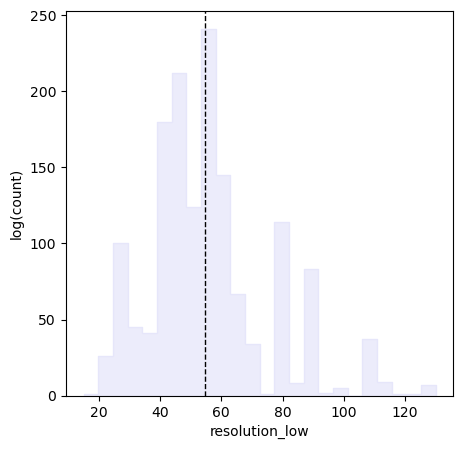

In [78]:
resolution_low_len = len(master_exp_data_df)
#resolution_low_t_len = len(d_rscc.query('validation_rscc > 0.85'))
#print("{}\t{}\t{}%".format(rscc_len, rscc_t_len, round(100*(rscc_t_len/rscc_len),2)))
bns_rscc = np.linspace(15, 130, 25)
plot_hist(master_exp_data_df.resolution_low, "resolution_low", bns_rscc, "lavender", logy = False)#, et = 0.85)

1496	17	1.14%
	MIN = 0.9	MEAN = 1.55	MEDIAN = 1.57	MAX = 3.28


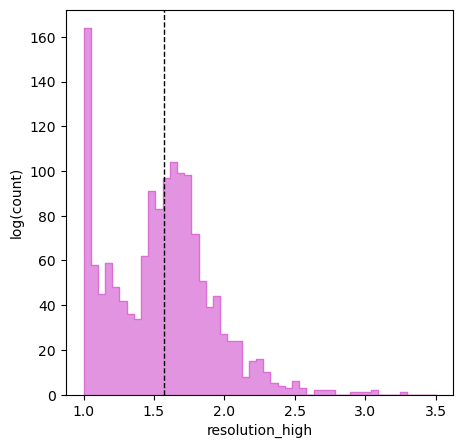

In [76]:
d_len = len(master_exp_data_df)
d_t_len = len(master_exp_data_df.query('resolution_high > 2.5'))
print("{}\t{}\t{}%".format(d_len, d_t_len, round(100*(d_t_len/d_len),2)))
bns_d = np.linspace(1, 3.5, 50)
plot_hist(master_exp_data_df.resolution_high, "resolution_high", bns_d, "orchid", logy = False)#, et = 0.85)

1496	134	8.96%
	MIN = 0.9	MEAN = 1.55	MEDIAN = 1.57	MAX = 3.28


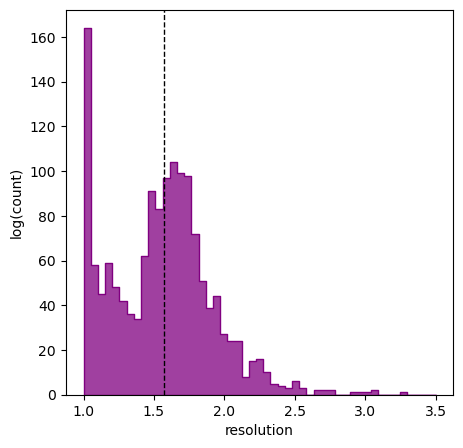

In [75]:
d_len = len(master_exp_data_df)
d_t_len = len(master_exp_data_df.query('resolution > 2'))
print("{}\t{}\t{}%".format(d_len, d_t_len, round(100*(d_t_len/d_len),2)))
bns_d = np.linspace(1, 3.5, 50)
plot_hist(master_exp_data_df.resolution, "resolution", bns_d, "purple", logy = False)#, et = 0.85)

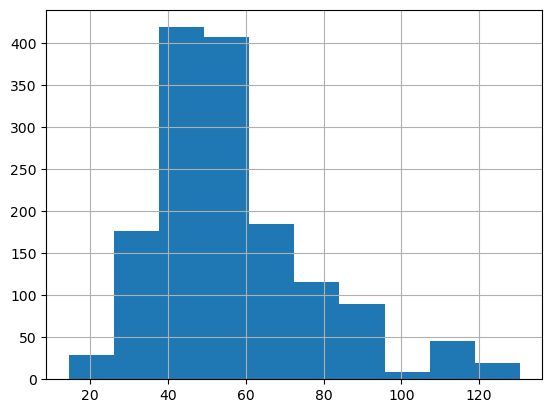

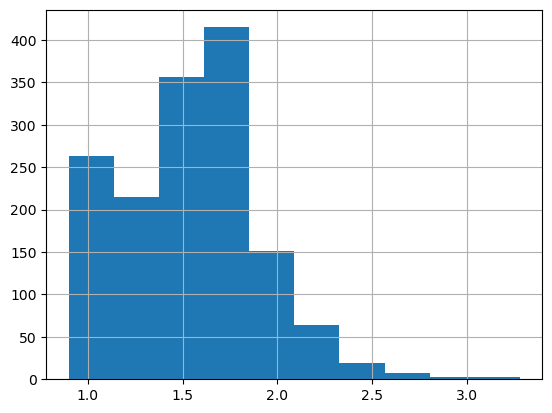

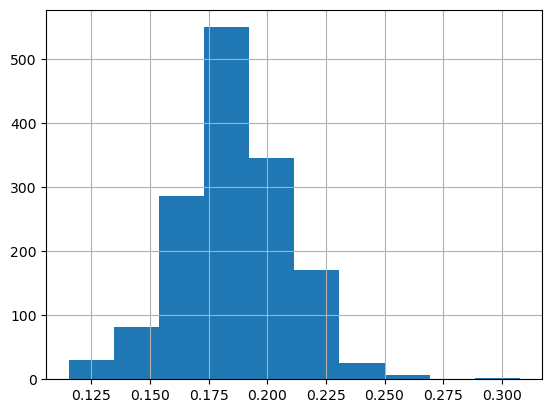

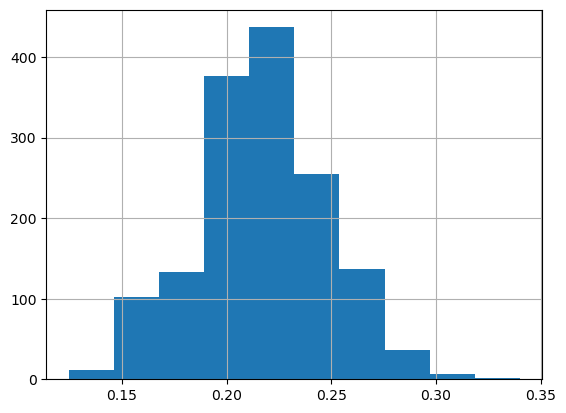

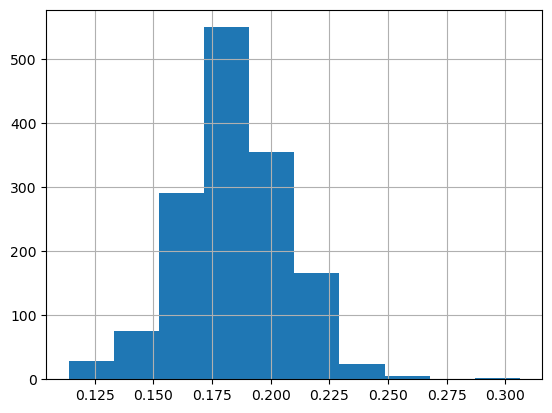

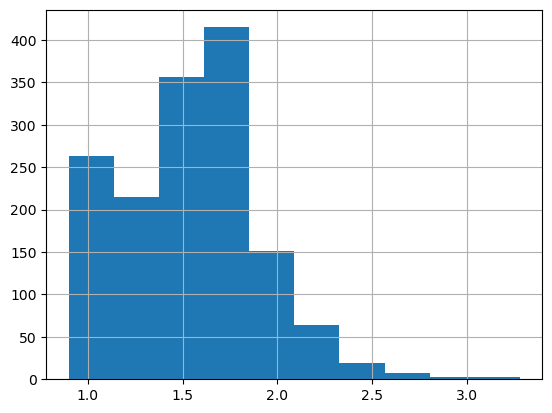

In [72]:
master_exp_data_df.resolution_low.hist()
plt.show()
master_exp_data_df.resolution_high.hist()
plt.show()
master_exp_data_df.r_factor.hist()
plt.show()
master_exp_data_df.r_free.hist()
plt.show()
master_exp_data_df.r_work.hist()
plt.show()
master_exp_data_df.resolution.hist()
plt.show()